import

In [1]:
%matplotlib inline
import os
import torch

import matplotlib.pyplot as plt
import torchvision.models as models

# from flashtorch.utils import apply_transforms, load_image
# from flashtorch.saliency import Backprop

import dataLoader
from configParser import ConfigParser, getModelName

cuda

In [2]:
# CUDA support 
if torch.cuda.is_available():
    torch.cuda.set_device(0) # 0
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    print("We are using cuda")

We are using cuda


parameters

In [3]:
# params
experimentName = "test_22987_suffix50_11_CNN2_differentConfig_batchnorm"
experiment_index = 0
trial_index=6
experiment_type = "multi-trial"

importLoad experiment

In [4]:
from configParser import ConfigParser
config_parser = ConfigParser(experimentName)

experimentName = os.path.join(experimentName, experiment_type)
print(experimentName)

test_22987_suffix50_11_CNN2_differentConfig_batchnorm/multi-trial


load dataset

In [5]:
if experiment_type == "multi-trial" or experiment_type == "selected-multi-trial":
    if experiment_type == "multi-trial":
        paramsIterator = config_parser.getHyperpIter()
    else:
        paramsIterator = config_parser.getHyperpSelectedIter()
        
    for indx, e in enumerate(paramsIterator):
        if indx ==experiment_index:
            experiment_params = e
            break
            
elif experiment_type == "single-trial":
    experiment_params = config_parser.read()
else:
    raise


# experiment_params['normalizeFromResnet']=False
# experiment_params['unsupervisedOnTest']=False
# experiment_params["lambda"]=1

print(experiment_params)

{'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'imageDimension': 224, 'n_channels': 3, 'augmentation': False, 'batchSize': 550, 'n_epochs': 4000, 'learning_rate': 0.01, 'numOfTrials': 10, 'patience': 100, 'useHeirarchy': True, 'useRelu': True, 'downsample': True, 'downsampleOutput': 200, 'takeFromIntermediate': True, 'takeFromIntermediateOutput': 200, 'fc_layers': 2, 'useAdam': False, 'resnet': '18', 'normalize': True, 'softmax': True, 'batchNormalize': True, 'normalizeFromResnet': False, 'unsupervisedOnTest': False, 'lambda': 1}


In [6]:
datasetManager = dataLoader.datasetManager(experimentName, True)
datasetManager.updateParams(experiment_params)
dataset = datasetManager.getDataset()

Creating dataset...
Loading dataset...


 79% (439 of 550) |#################     | Elapsed Time: 0:00:00 ETA:   0:00:00

Going through image files


100% (550 of 550) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (3 of 550) |                        | Elapsed Time: 0:00:00 ETA:   0:00:25

Transfrom images...


100% (550 of 550) |######################| Elapsed Time: 0:00:43 Time:  0:00:43


dataset has a mean: tensor([0.7661, 0.7249, 0.6513]) and std: tensor([0.1420, 0.1753, 0.2096])
Creating dataset... Done.


Load model of a specific trial

In [7]:
import CNN

speciesList = dataset.getSpeciesList()
numberOfSpecies = len(speciesList)
genusList = dataset.getGenusList()
numberOfGenus = len(genusList)

trialName = experimentName
if experiment_type != "single-trial":
    trialName = os.path.join(experimentName, getModelName(experiment_params, trial_index))

architecture = {
    "species": numberOfSpecies,
    "genus" : numberOfGenus
}
model = CNN.create_model(architecture, experiment_params)
df, epochs, time_elapsed = CNN.loadModel(model, trialName)

Model wrapper

In [8]:
from flashtorch_modified import CNN_wrapper, Backprop, SaliencyMap

wrapped_model = CNN_wrapper(model, experiment_params, dataset)

Saliency map of one image

In [9]:
# params

wrapped_model.setOutputsOfInterest({
    "species": True,
    "genus" : False
})
img_full_path="/data/BGNN_data/INHS_cropped/images"

fileName= 'INHS_FISH_91030.jpg' # 'INHS_FISH_46448.jpg'# "INHS_FISH_85839.jpg" # "test_INHS_FISH_50076.jpg" # INHS_FISH_106556.jpg

layerName = "species"
# "input": 
# "intermediate_resent":
# "genus_intermediate": 
# "downsampled_features":
# "genus": 
# "species":

Number of activations:  torch.Size([1, 11])


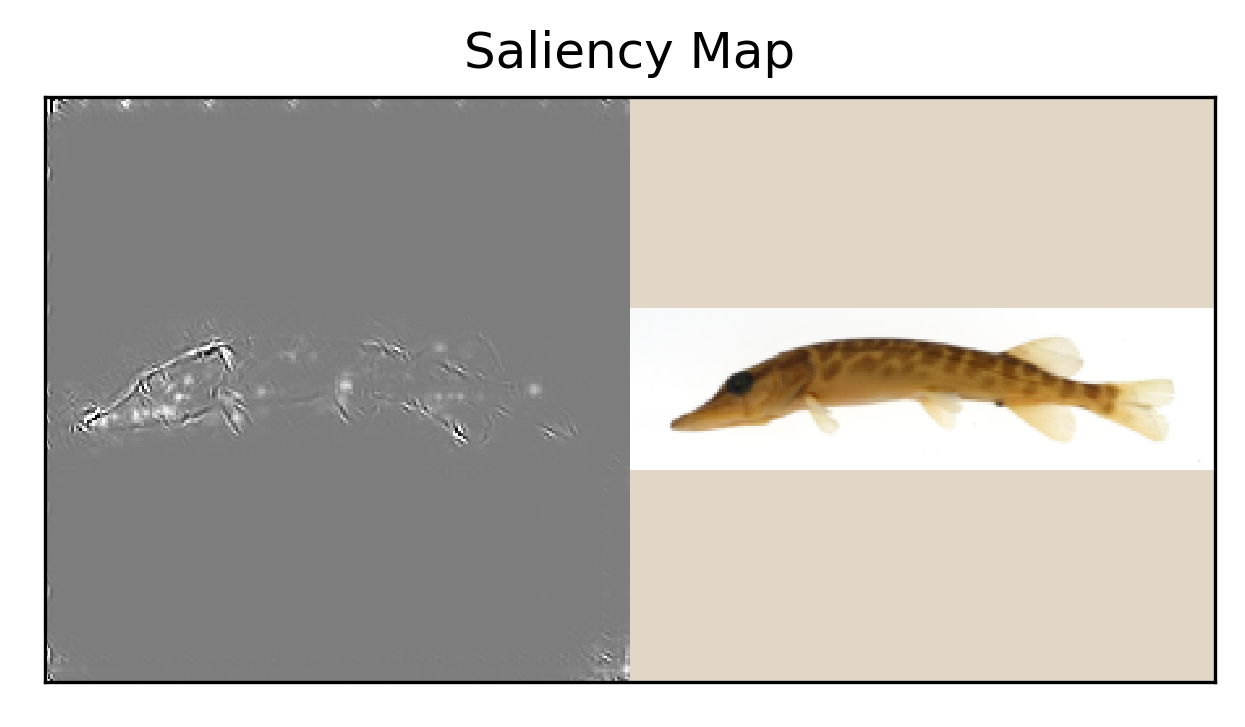

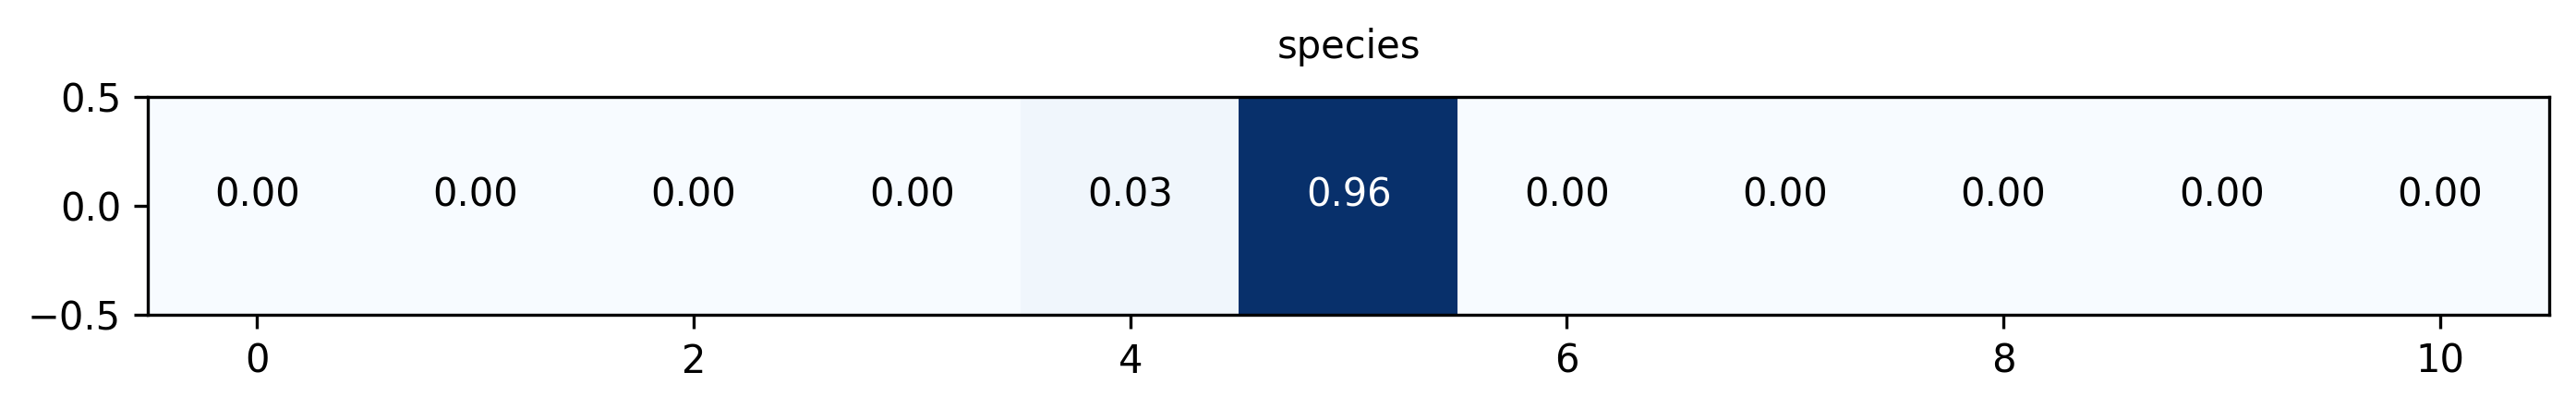

(tensor([[[ 1.4900e-03,  1.2661e-03, -1.0242e-04,  ...,  1.4126e-05,
            6.6431e-05,  4.7295e-06],
          [ 2.1958e-03,  1.4729e-03, -6.5539e-04,  ..., -9.7112e-06,
           -3.8235e-06,  3.4775e-05],
          [ 2.3596e-03,  1.2496e-03, -7.3375e-04,  ...,  2.6071e-05,
            1.2312e-05,  1.0559e-05],
          ...,
          [ 1.5020e-04, -5.7398e-05,  7.2253e-05,  ...,  2.6893e-05,
            4.7468e-05,  1.1236e-05],
          [ 5.5568e-04, -9.7977e-05,  5.4535e-05,  ...,  1.3881e-05,
            9.4862e-05,  6.3199e-05],
          [ 3.6201e-04,  2.4849e-04, -9.4342e-05,  ..., -2.7319e-05,
           -1.7145e-05,  5.9750e-05]]], device='cpu'),
 array([7.9460826e-04, 2.0995812e-04, 5.5286620e-04, 9.3144679e-04,
        3.0701147e-02, 9.6146011e-01, 4.4201670e-04, 2.4974041e-03,
        1.2606200e-03, 4.2319857e-04, 7.2659331e-04], dtype=float32))

In [10]:
import os
from torchvision import transforms as torchvision_transforms
from skimage import io

saliencyMap = SaliencyMap(dataset, wrapped_model, experimentName, experiment_params)
saliencyMap.GetSaliencyMap(img_full_path, fileName, layerName)

0 0
Number of activations:  torch.Size([1, 11])


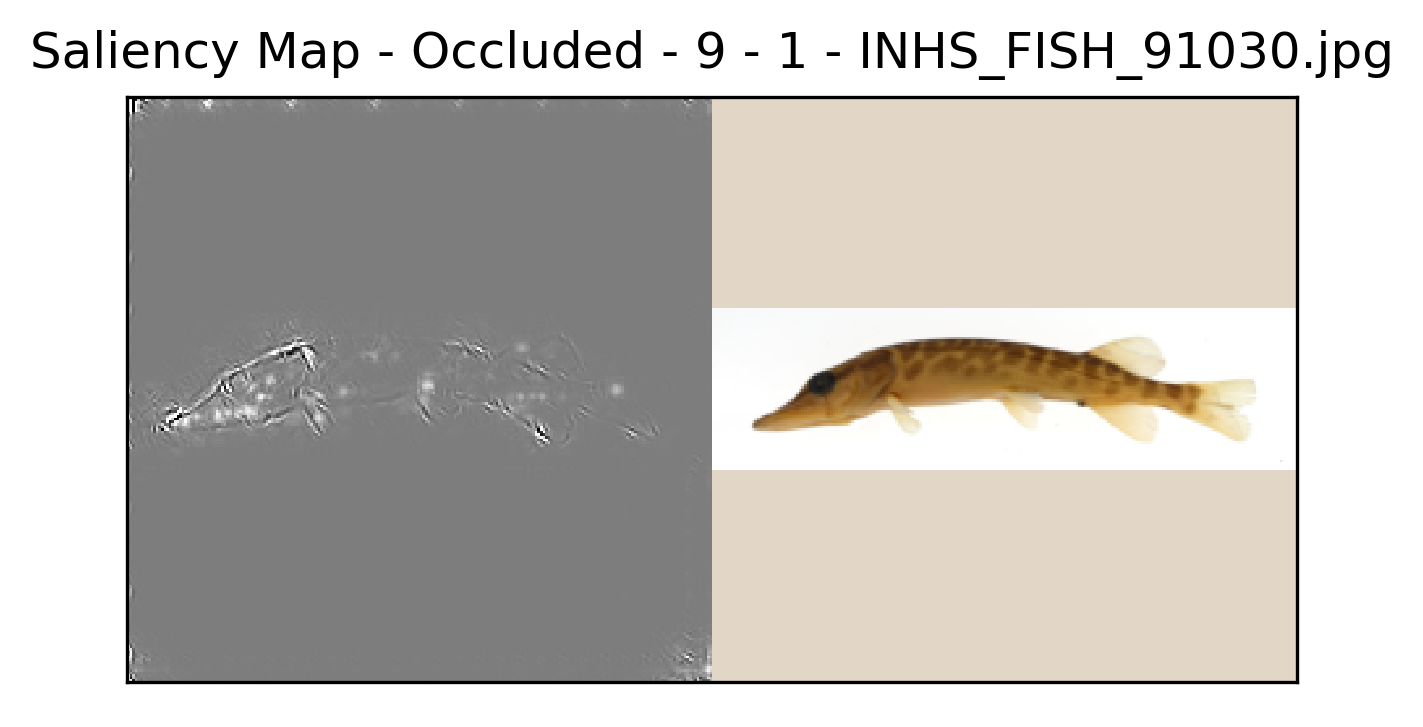

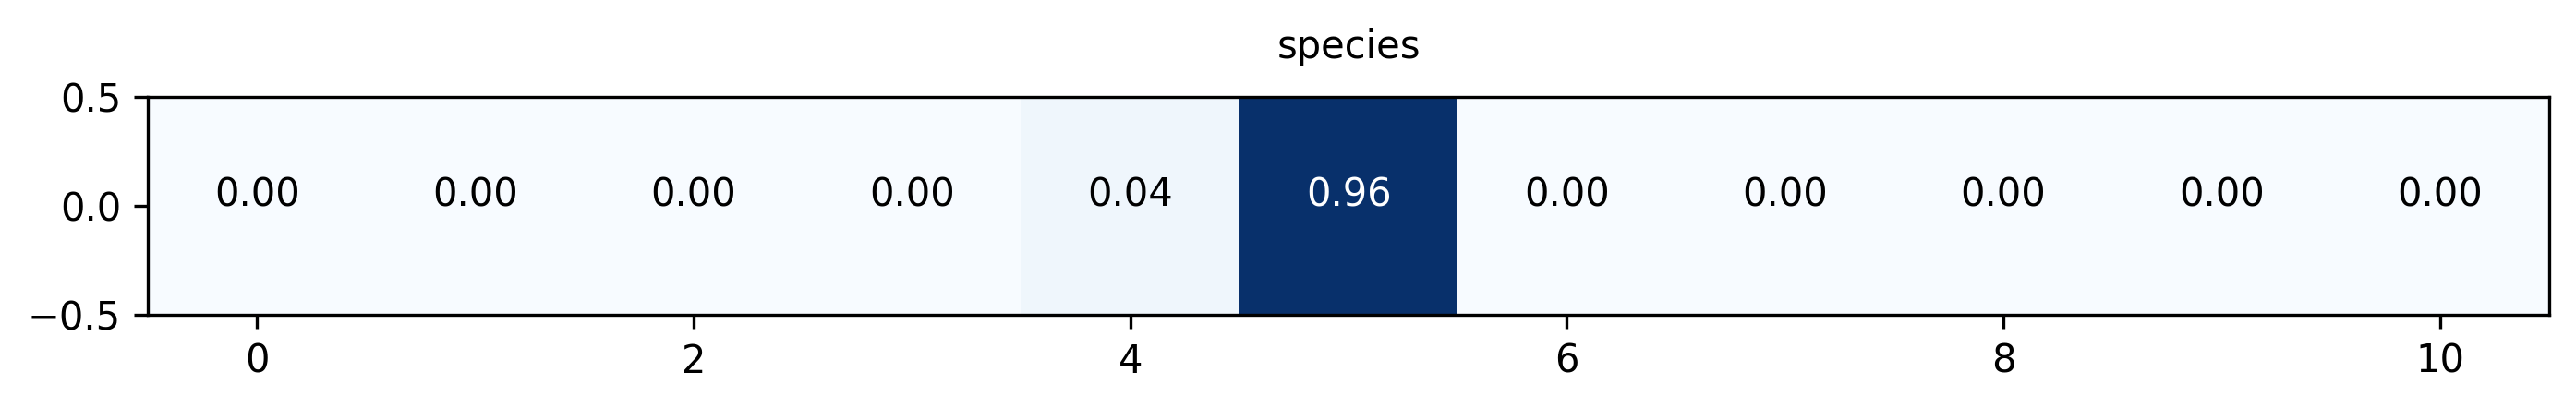

122 14
Number of activations:  torch.Size([1, 11])


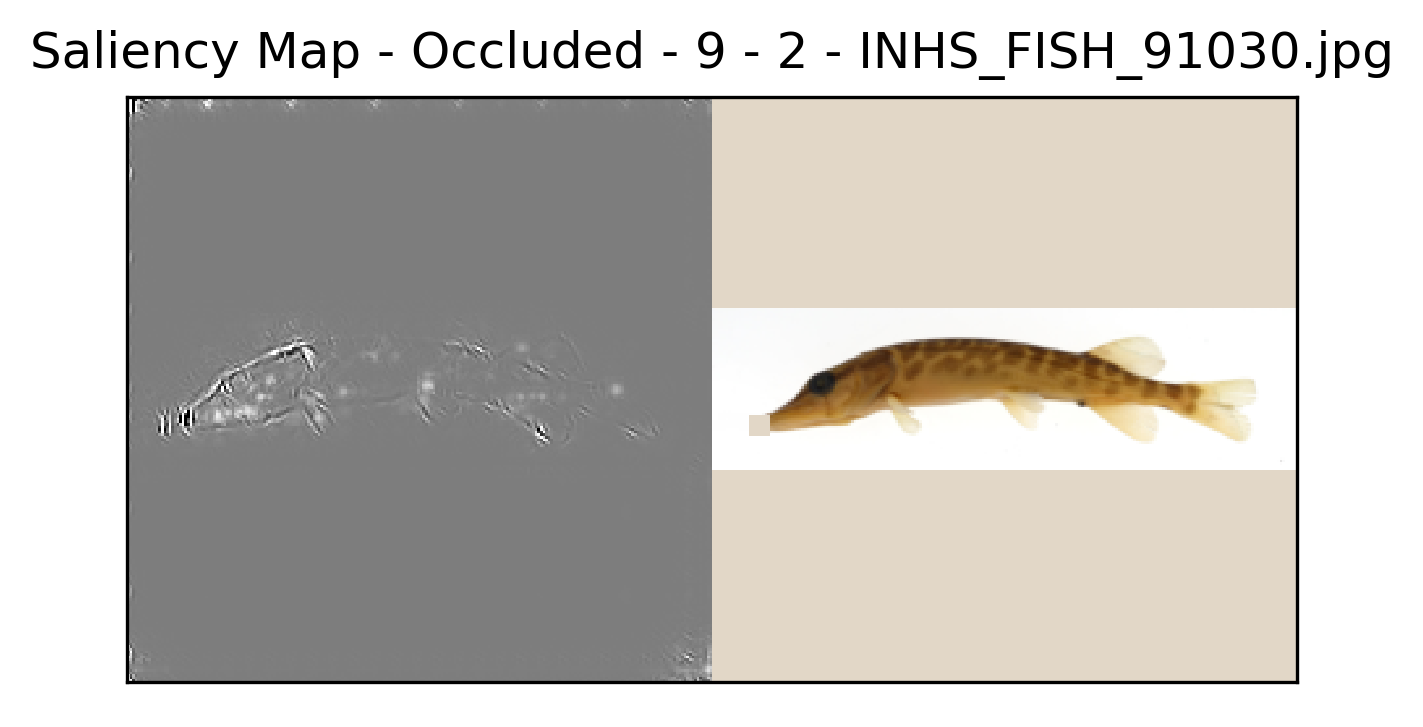

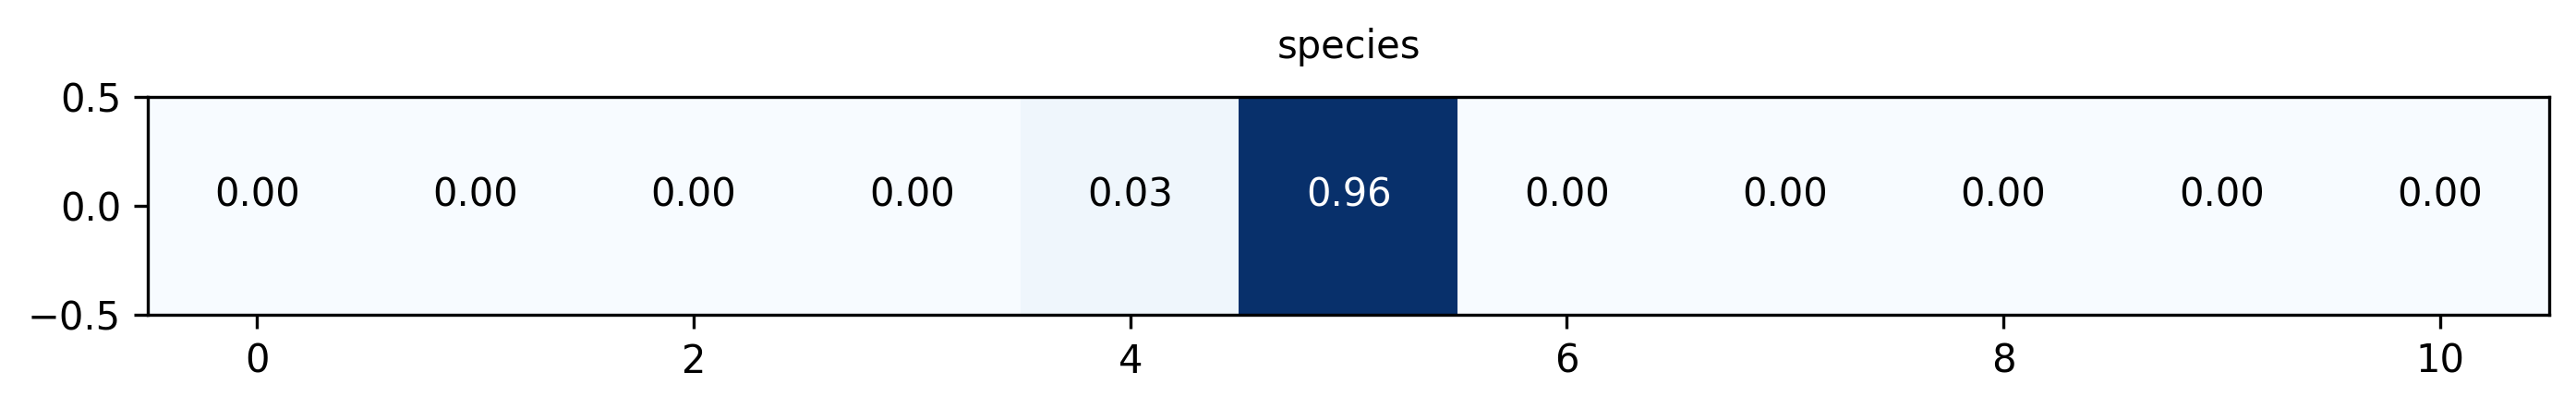

0 0
Number of activations:  torch.Size([1, 11])


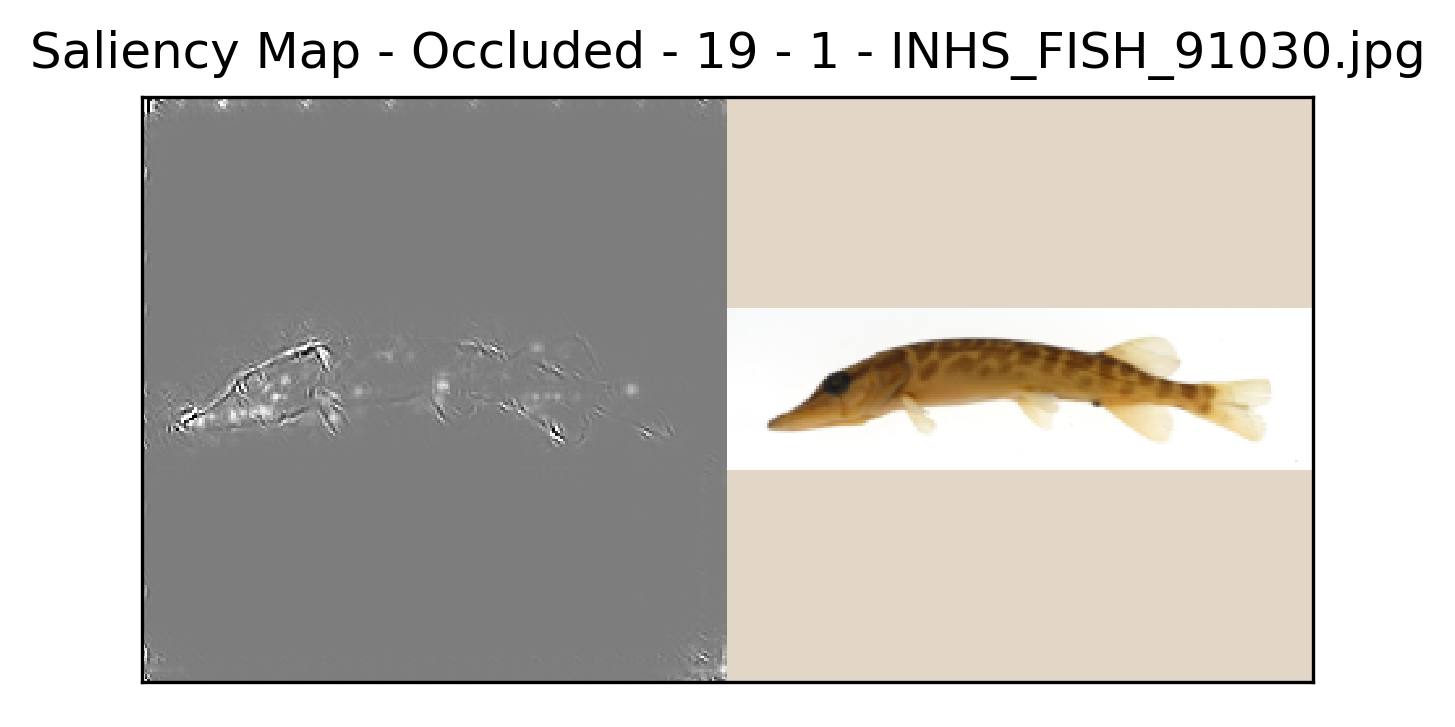

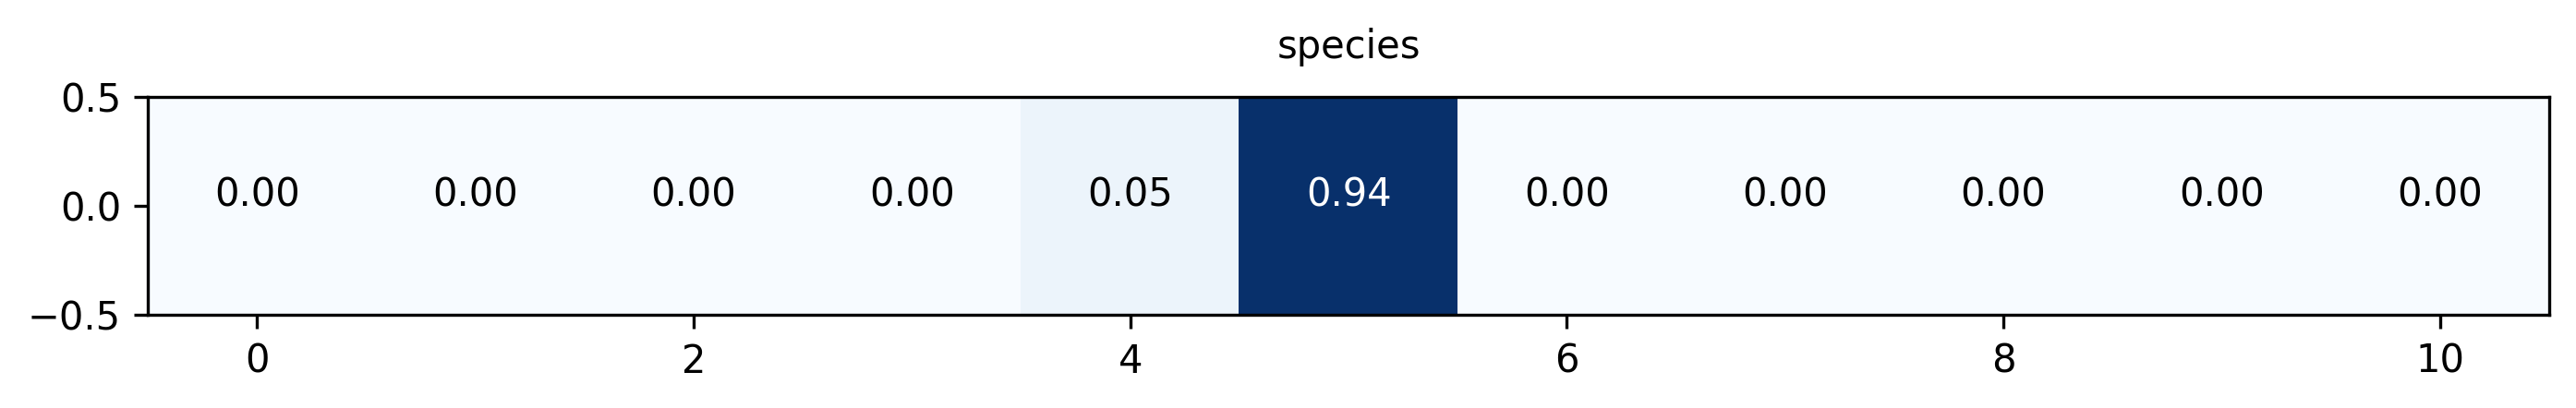

105 29
Number of activations:  torch.Size([1, 11])


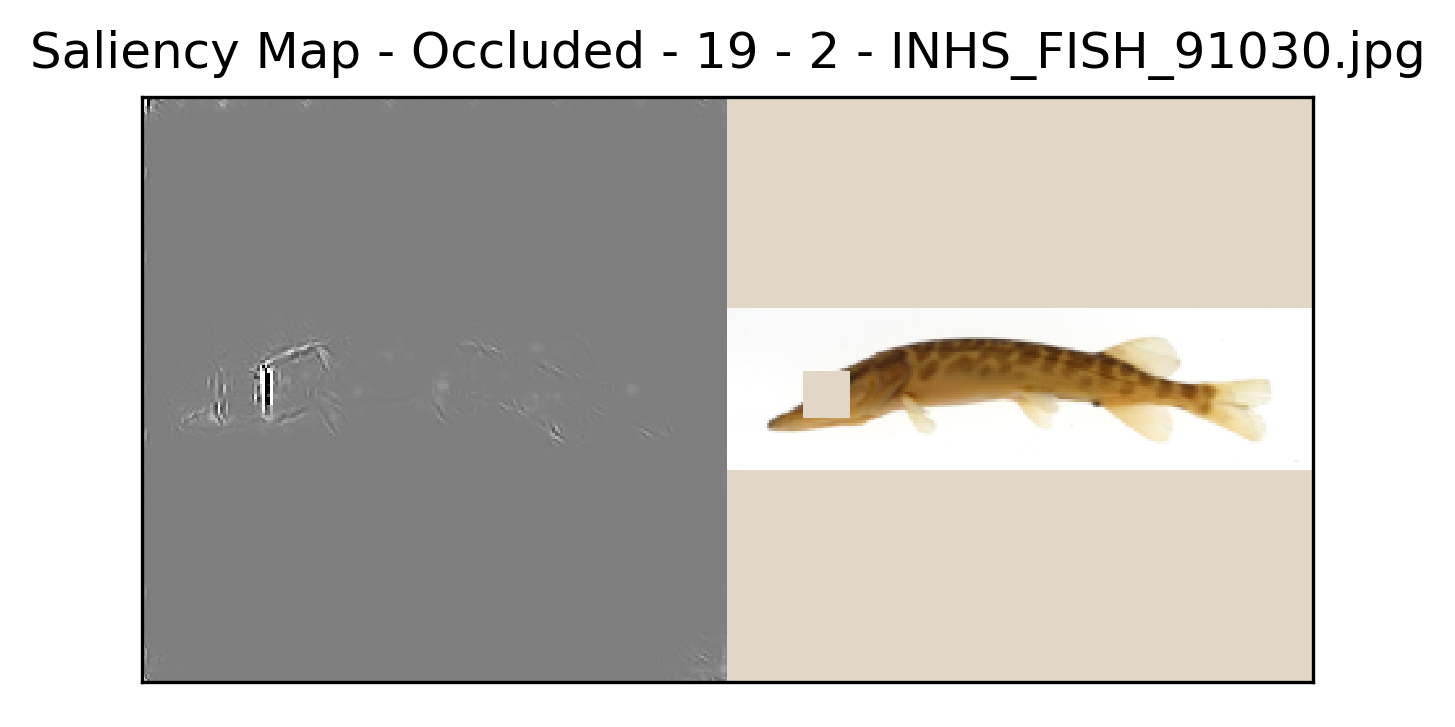

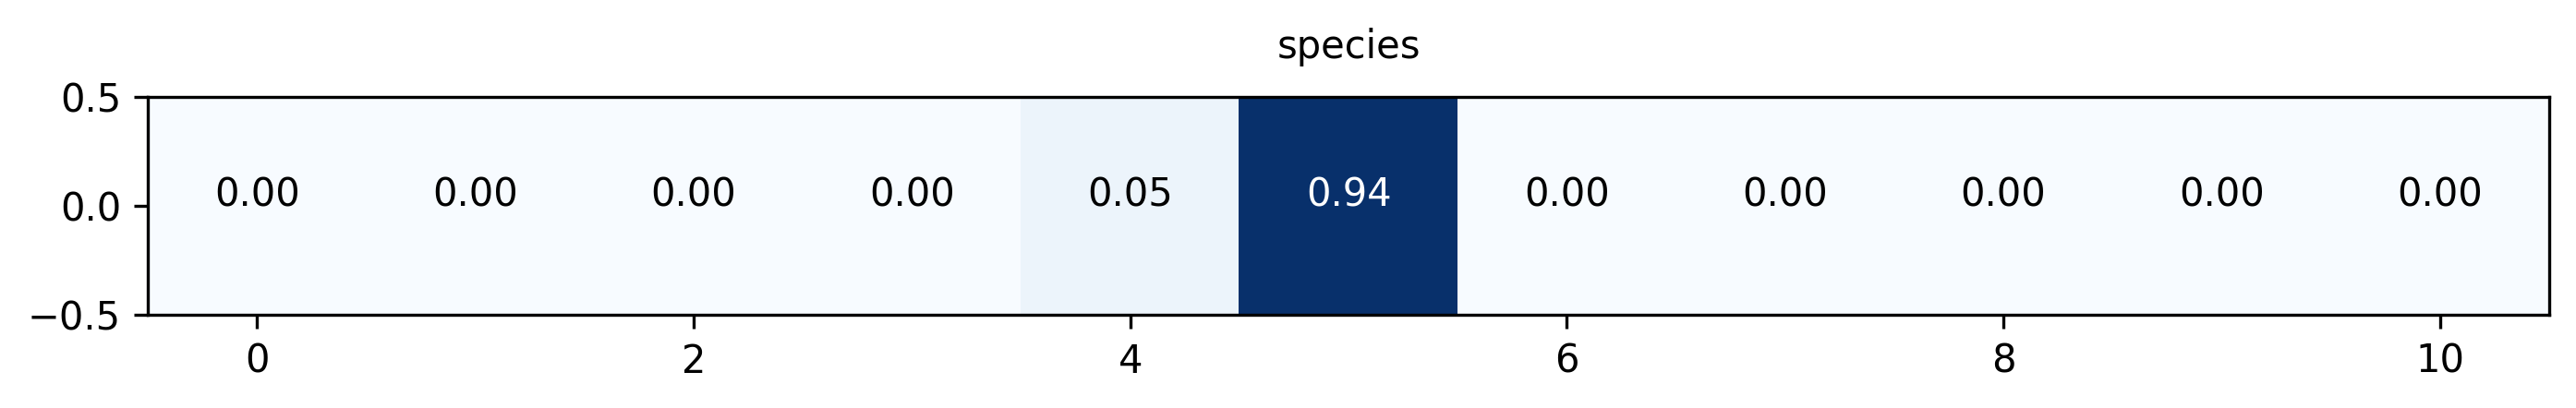

102 15
Number of activations:  torch.Size([1, 11])


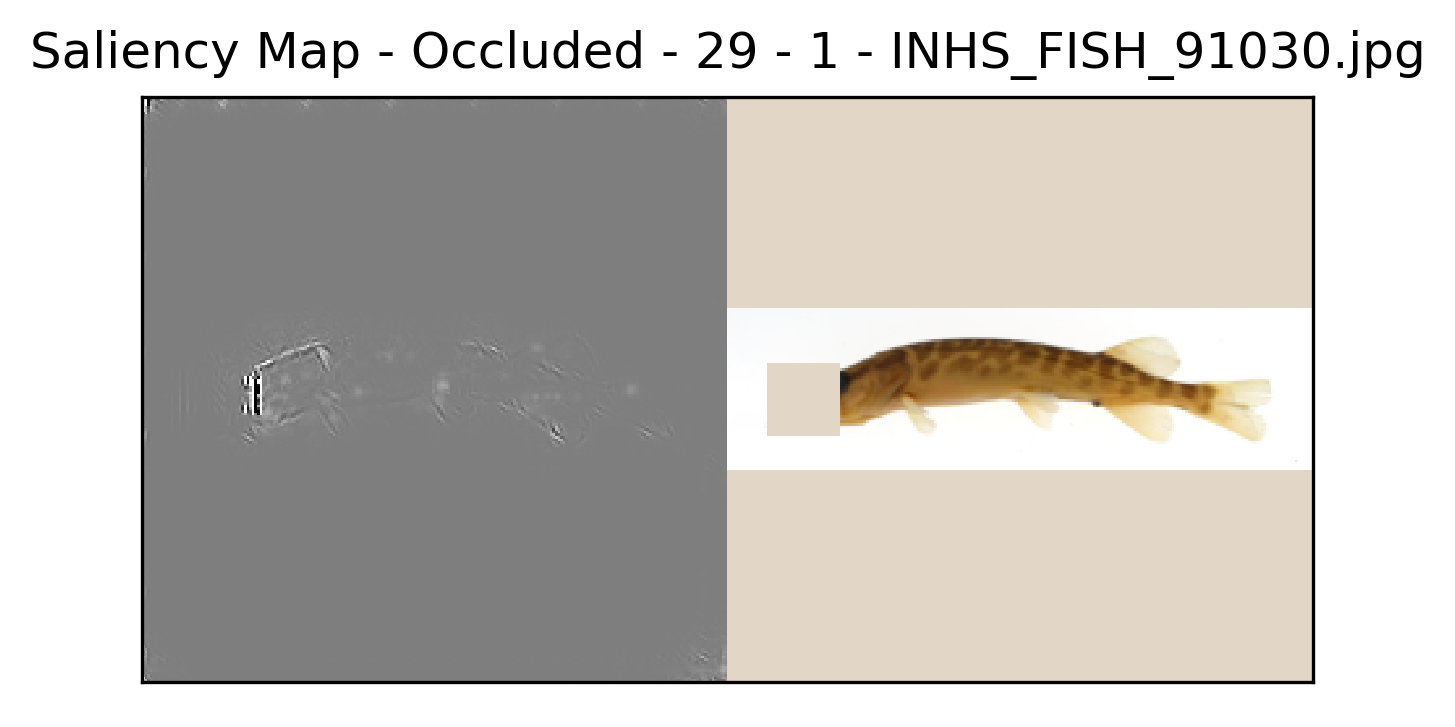

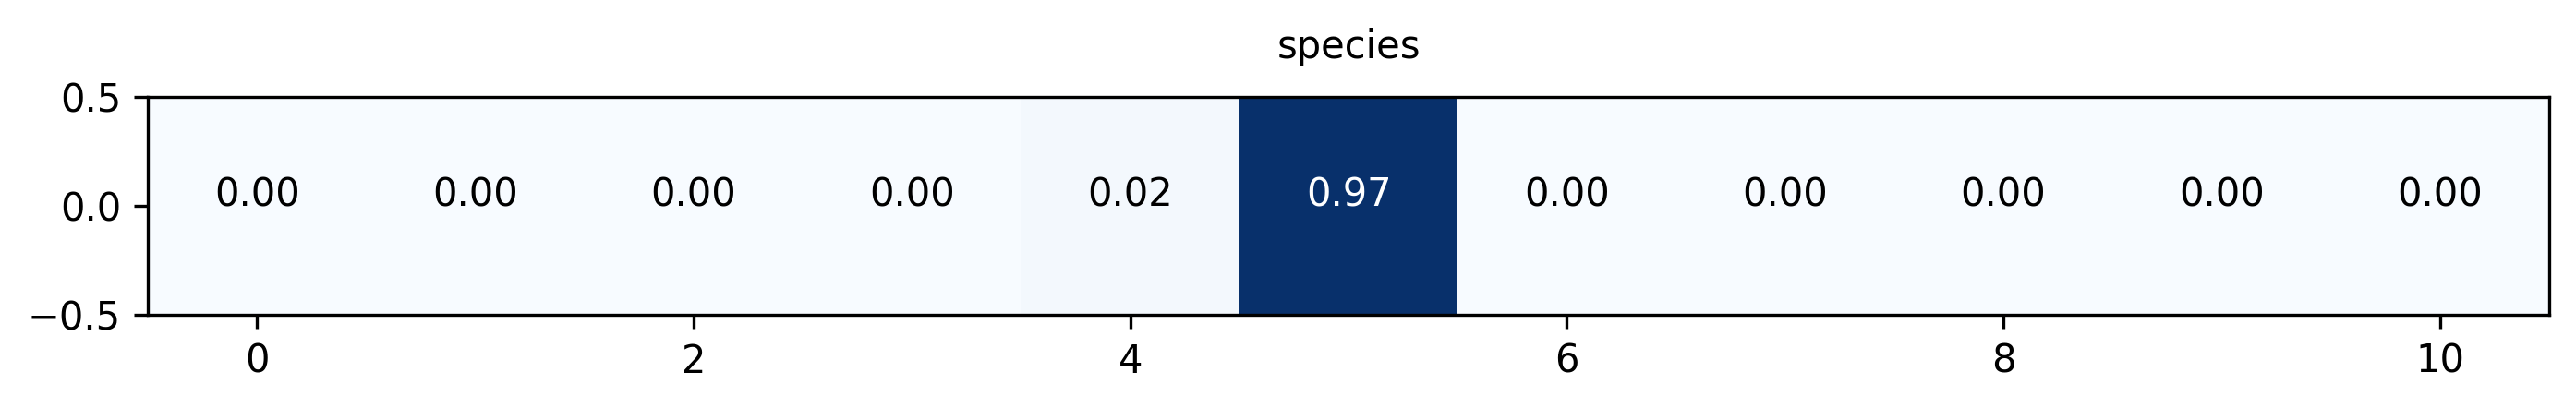

0 0
Number of activations:  torch.Size([1, 11])


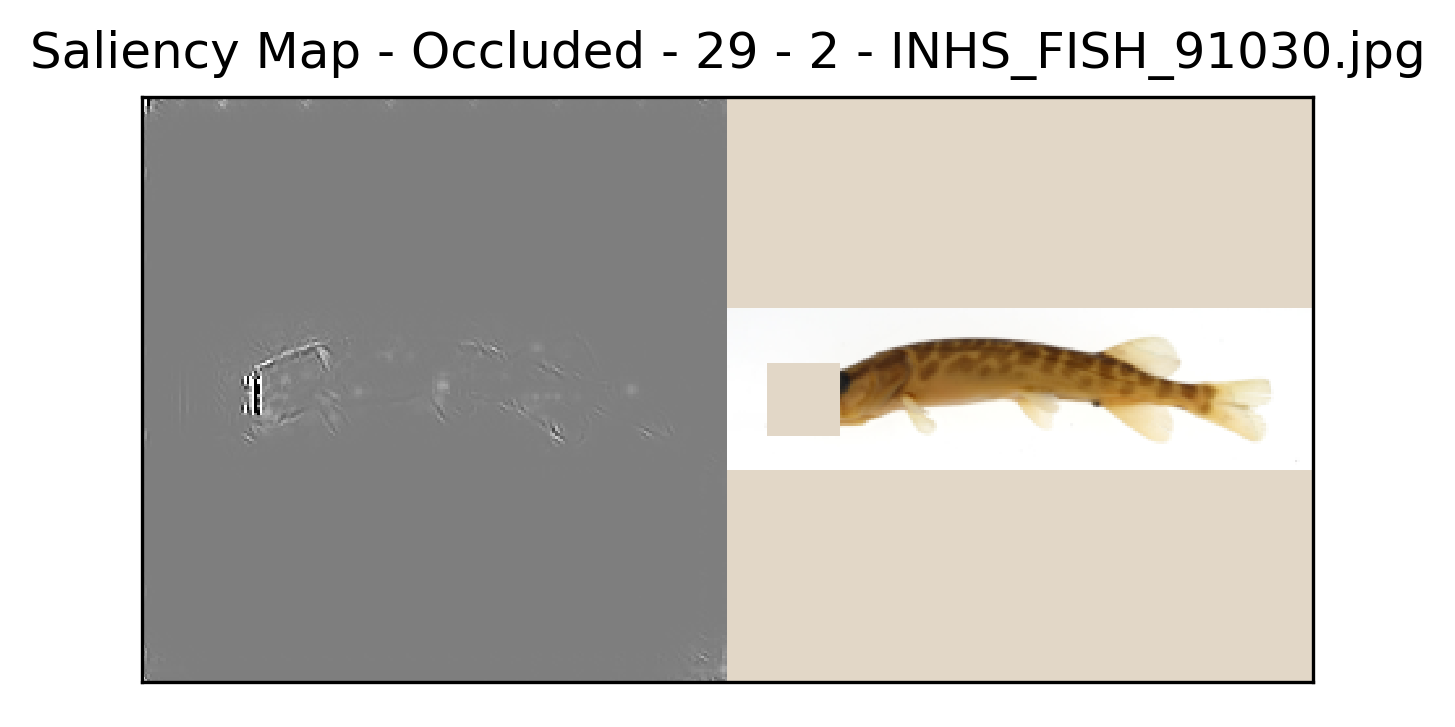

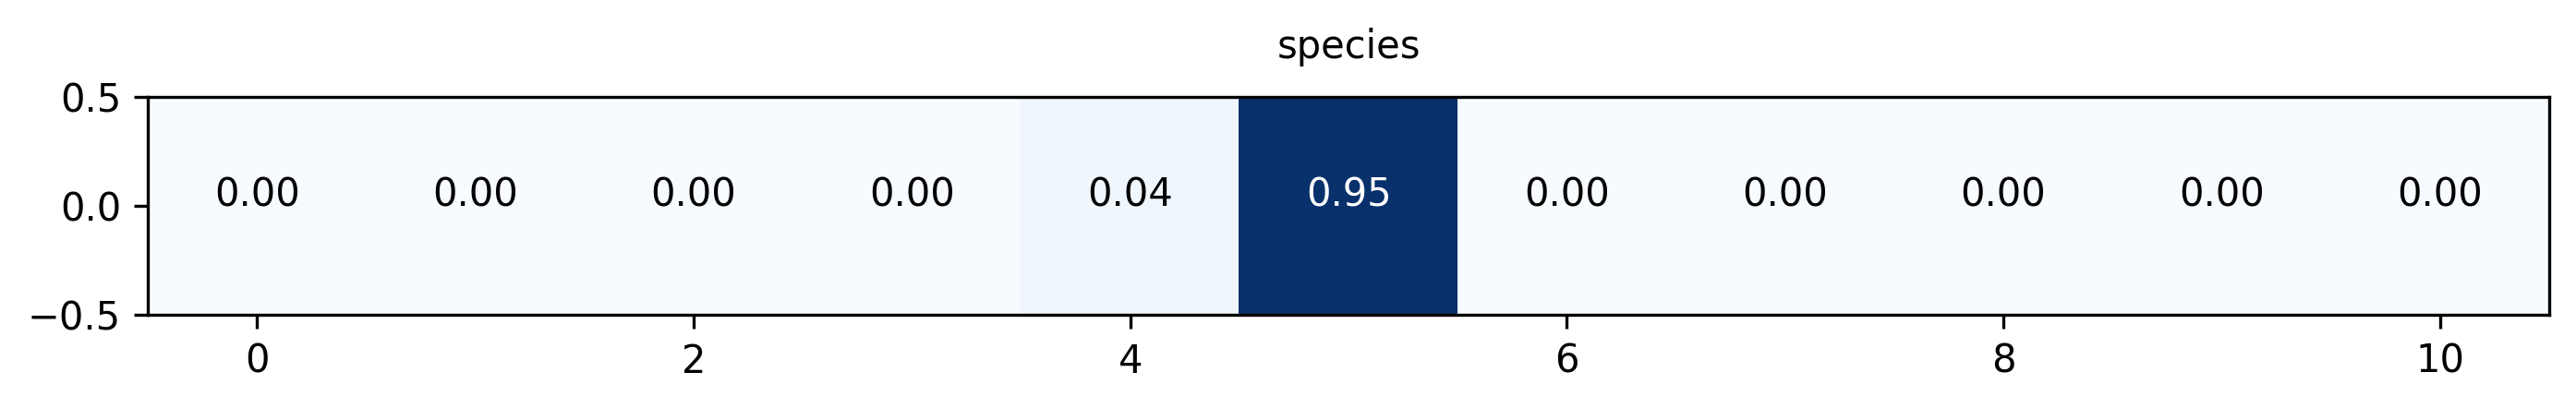

98 20
Number of activations:  torch.Size([1, 11])


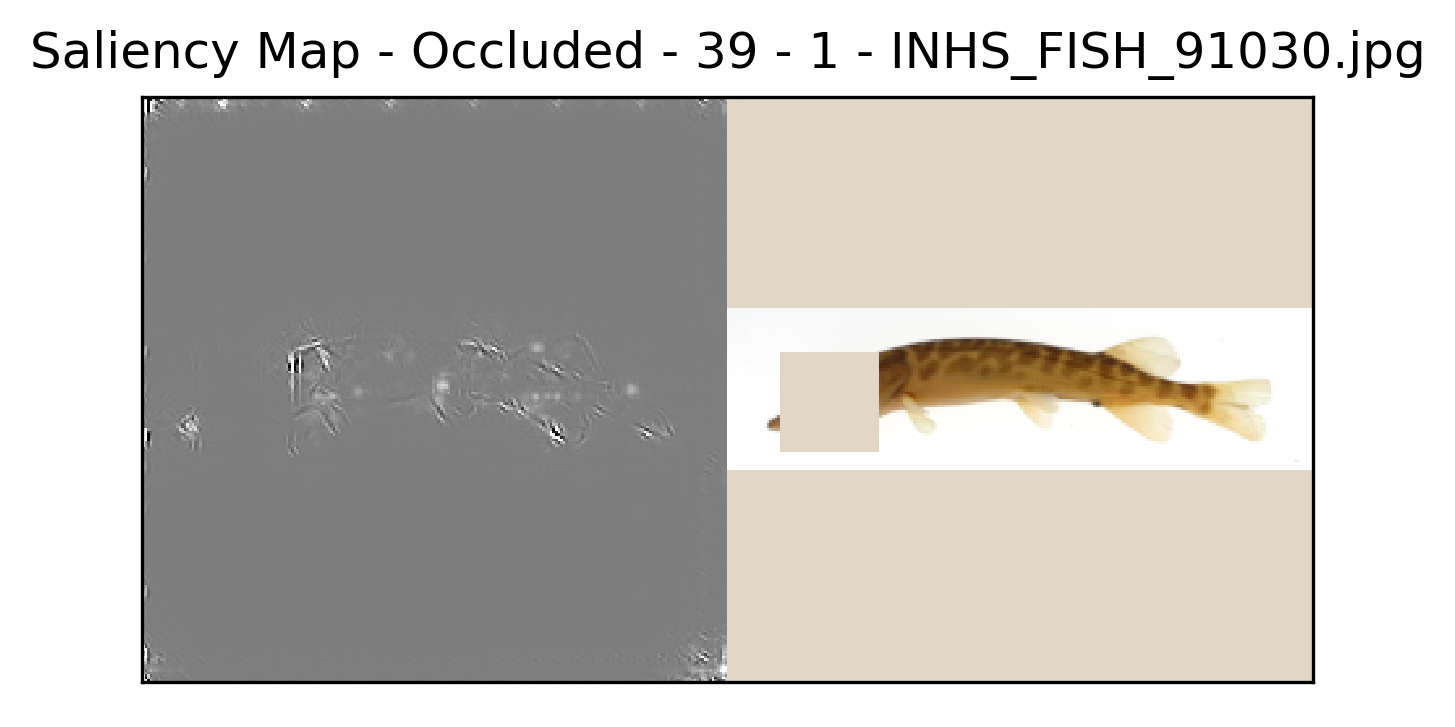

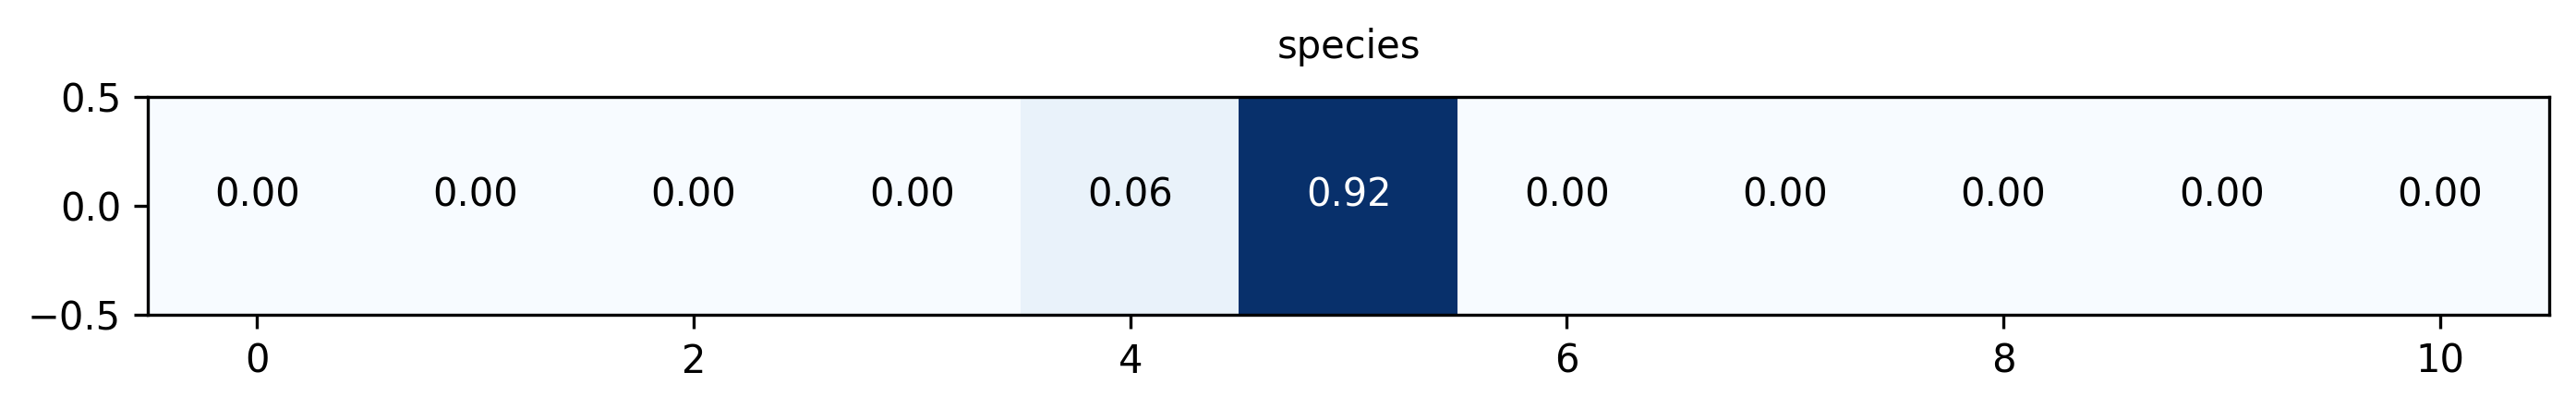

0 0
Number of activations:  torch.Size([1, 11])


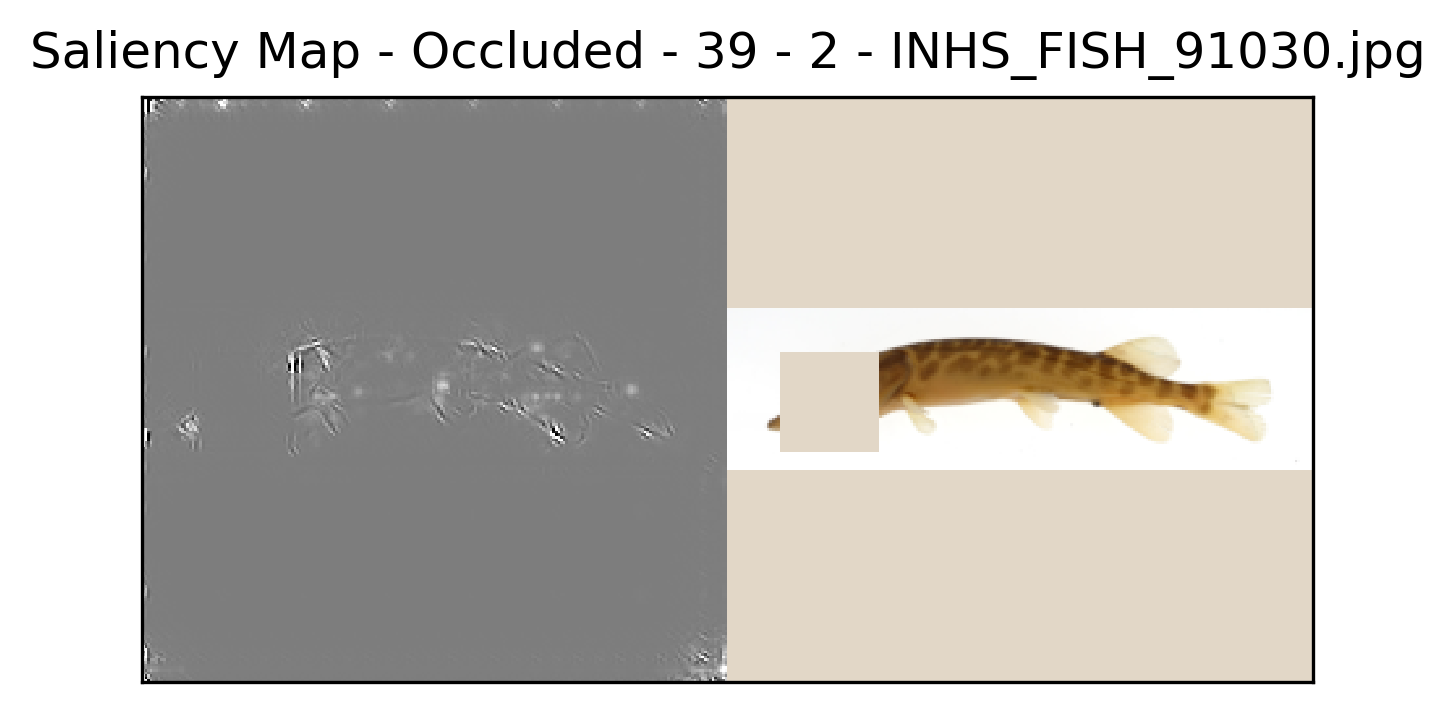

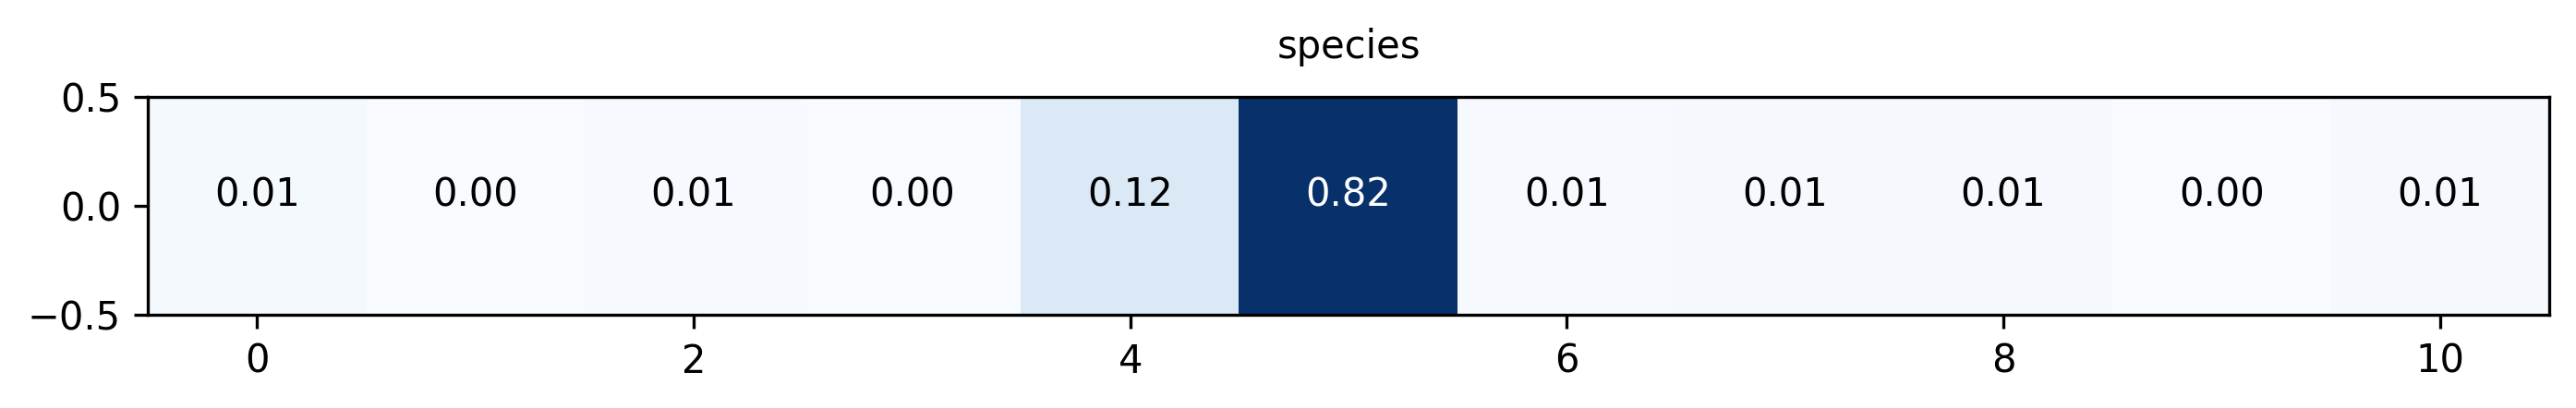

74 25
Number of activations:  torch.Size([1, 11])


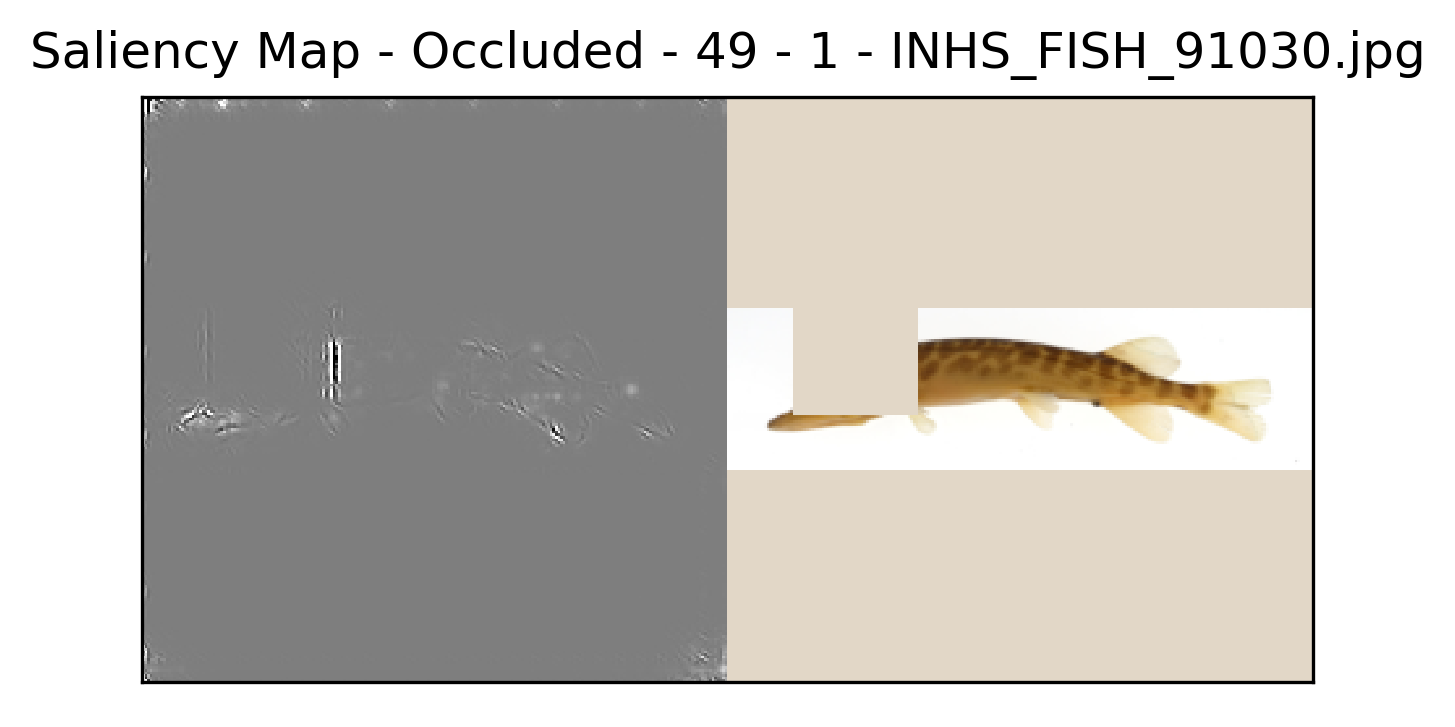

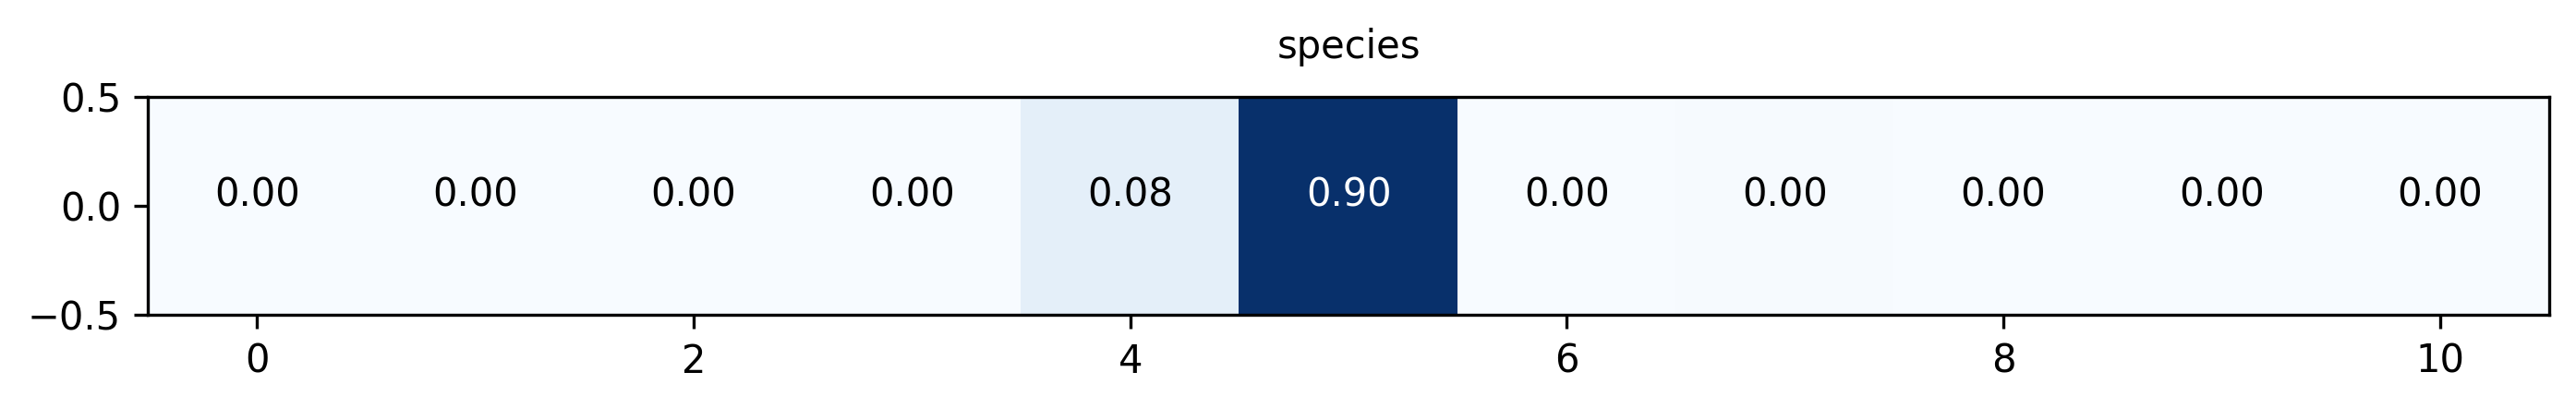

0 0
Number of activations:  torch.Size([1, 11])


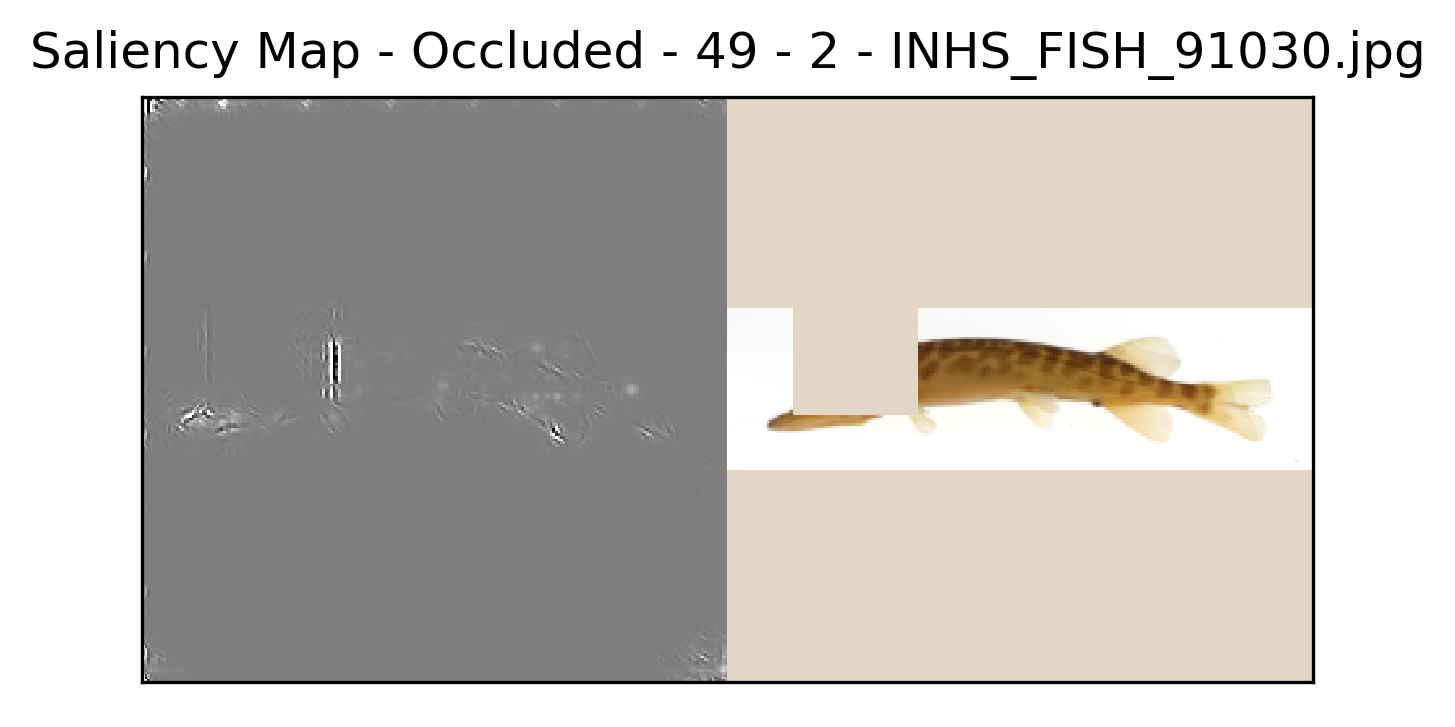

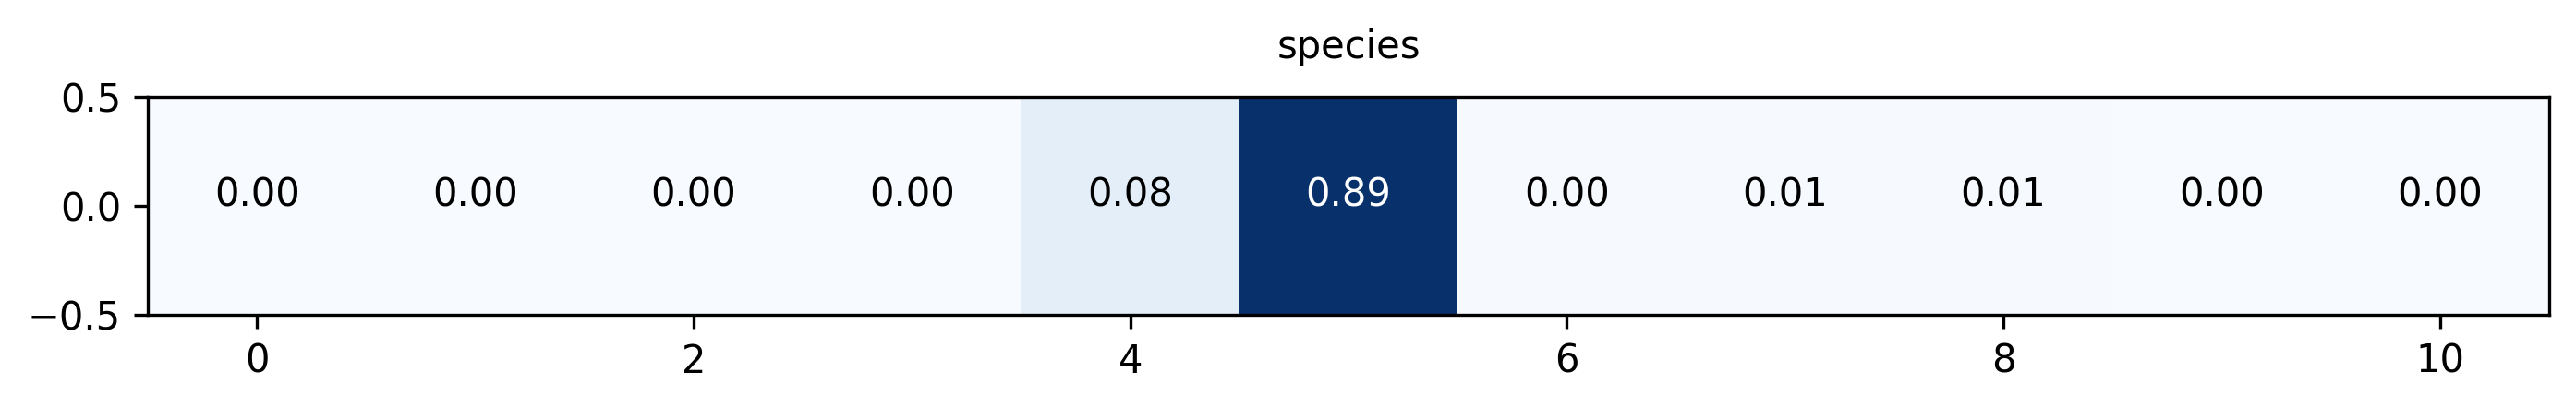

In [11]:
for i in [9, 19, 29 ,39 ,49]:
#     saliencyMap.GetSaliencyMap(os.path.join(img_full_path, fileName),layerName,box_width =i, maxCovered=True)
    saliencyMap.GetSaliencyMap(img_full_path, fileName,layerName,box_width =i, maxCovered=True, topk=2)

In [12]:
species = 0

train_loader, validation_loader, test_loader = datasetManager.getLoaders()
loader = train_loader

lst = []
for batch in loader:
#     print(batch)
    lst = lst + [batch['fileName'][i] for i in batch['species'] if batch['species'][i] == species]
print(lst)

  0% (5 of 550) |                        | Elapsed Time: 0:00:00 ETA:   0:00:14

Loading saved indices...
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_CNN2_differentConfig_batchnorm/multi-trial/tc0.640000_vc0.160000/trainingIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_CNN2_differentConfig_batchnorm/multi-trial/tc0.640000_vc0.160000/valIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_CNN2_differentConfig_batchnorm/multi-trial/tc0.640000_vc0.160000/testIndex.pkl read
Creating loaders...
Creating loaders... Done.
Transfrom images...


100% (550 of 550) |######################| Elapsed Time: 0:00:13 Time:  0:00:13


['INHS_FISH_30939.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_2401.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH

Iterate and give score

In [37]:
import progressbar
from PIL import Image

def getAverageCorrectProb(loader, layerName, box_width, topk):
    prob = []
    with progressbar.ProgressBar(redirect_stdout=True) as bar:
        bar.update(0)
        for img in loader:
            fileNames = img['fileName']
            lbls=img[layerName]
            for i, fileName in enumerate(fileNames):
                if topk > 0:
                    _, A = saliencyMap.GetSaliencyMap(img_full_path, fileName,layerName,box_width =box_width, maxCovered=True, topk=topk, plot=False)
                else:
                    isSpecies = (layerName == "species")
                    activationOutputs = {
                        "species": isSpecies,
                        "genus" : not isSpecies
                    }
                    img = saliencyMap.getTransformedImage(Image.open(os.path.join(img_full_path, fileName)), False, True)
                    wrapped_model.setOutputsOfInterest(activationOutputs)
                    A = wrapped_model(img.cuda())
                A=A[0]
                lbl = lbls[i]
                prob.append(A[lbl])
                bar.update(len(prob))
#                 print(fileName, lbl, A)
    return (sum(prob) / len(prob)).item()

In [21]:
getAverageCorrectProb(test_loader, "species", 19, 1)

| |        #                                        | 110 Elapsed Time: 0:04:43


0.6010208129882812

In [15]:
getAverageCorrectProb(test_loader, "species", 19, 2)

| |                                          #      | 110 Elapsed Time: 0:03:39


0.5795086622238159

In [38]:
getAverageCorrectProb(test_loader, "genus", 19, 0)

| |        #                                        | 110 Elapsed Time: 0:00:20


0.9095792174339294

In [16]:
getAverageCorrectProb(test_loader, "genus", 19, 1)

| |       #                                         | 110 Elapsed Time: 0:05:42


0.8722317218780518

In [22]:
getAverageCorrectProb(test_loader, "genus", 19, 2)

| |        #                                        | 110 Elapsed Time: 0:14:13


0.8672341704368591

In [17]:
CNN.getGenusAccuracyFromLoader(test_loader, model, experiment_params)

0.9454545454545454

In [18]:
print(CNN.getAvgProbBestGuessFromLoader(test_loader, model, experiment_params))

0.769526481628418


In [19]:
print(CNN.getAvgEntropyFromLoader(test_loader, model, experiment_params))

0.947654664516449


In [20]:
print(CNN.getAvgProbCorrectGuessFromLoader(test_loader, model, experiment_params))

0.6764951944351196


Always use normalizeFromResnet = False for this!